In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 1. World happiness report

#### (a) Regions 

In [2]:
df_whr = pd.read_csv('world_happiness_report.csv')
df_rg = pd.read_csv('region.csv')
df_rg.rename(columns={'name': 'Country name'}, inplace=True)

In [3]:
df = pd.merge(df_whr,df_rg[['Country name','region']],on='Country name', how='left')
df.columns

Index(['Country name', 'year', 'Life Ladder', 'Log GDP per capita',
       'Social support', 'Healthy life expectancy at birth',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Positive affect', 'Negative affect',
       'region'],
      dtype='object')

#### (b) Life-expectancy 

In [4]:
life_expt = df.groupby(['year', 'region'])['Healthy life expectancy at birth'].aggregate('mean').unstack()
print(life_expt)

region     Africa   Americas       Asia     Europe  Oceania
year                                                       
2005    59.700000  66.550000  63.371429  69.164286    71.40
2006    47.149091  64.386667  63.132308  66.280000    71.20
2007    48.010476  65.096190  62.586207  66.657600    71.56
2008    49.740769  64.544545  62.742424  68.382727    71.74
2009    51.669091  66.068000  63.537838  67.831111      NaN
2010    52.576000  64.642857  63.835135  68.446875    72.10
2011    53.174444  64.980000  63.745854  68.469412    72.21
2012    54.541935  65.286364  63.408500  68.975676    72.32
2013    54.055000  65.722609  63.836500  68.957714    72.43
2014    54.698857  66.061739  64.179487  69.243889    72.54
2015    54.848485  66.614286  64.263415  69.527027    72.65
2016    55.494444  66.828571  64.708333  69.794595    72.90
2017    56.044737  66.891304  64.900000  70.062162    73.15
2018    57.156757  67.335000  65.268421  70.255556    73.40
2019    57.524324  68.023810  65.700000 

#### (c) Pivot table for life-expectancy

In [5]:
df.pivot_table('Healthy life expectancy at birth', index = 'region', columns = 'year')

year,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
region,,,,,,,,,,,,,,,,
Africa,59.700000,47.149091,48.010476,49.740769,51.669091,52.576000,53.174444,54.541935,54.055000,54.698857,54.848485,55.494444,56.044737,57.156757,57.524324,59.031250
Americas,66.550000,64.386667,65.096190,64.544545,66.068000,64.642857,64.980000,65.286364,65.722609,66.061739,66.614286,66.828571,66.891304,67.335000,68.023810,68.300000
Asia,63.371429,63.132308,62.586207,62.742424,63.537838,63.835135,63.745854,63.408500,63.836500,64.179487,64.263415,64.708333,64.900000,65.268421,65.700000,66.391667
Europe,69.164286,66.280000,66.657600,68.382727,67.831111,68.446875,68.469412,68.975676,68.957714,69.243889,69.527027,69.794595,70.062162,70.255556,70.591667,71.026471
Oceania,71.400000,71.200000,71.560000,71.740000,NaN,72.100000,72.210000,72.320000,72.430000,72.540000,72.650000,72.900000,73.150000,73.400000,73.650000,73.900000


#### (d) Pivot table for generosity

In [6]:
df.pivot_table('Generosity', index = ['region', 'Country name'], columns = 'year')

year                    2005   2006   2007   2008   2009   2010   2011   2012  \
region  Country name                                                            
Africa  Algeria          NaN    NaN    NaN    NaN    NaN -0.205 -0.181 -0.172   
        Angola           NaN    NaN    NaN    NaN    NaN    NaN  0.055 -0.136   
        Benin            NaN -0.011    NaN -0.004    NaN    NaN -0.142 -0.111   
        Botswana         NaN -0.195    NaN -0.164    NaN -0.143 -0.250 -0.203   
        Burkina Faso     NaN  0.028 -0.060 -0.101    NaN -0.036 -0.105 -0.070   
...                      ...    ...    ...    ...    ...    ...    ...    ...   
Europe  Switzerland      NaN  0.290    NaN    NaN  0.125    NaN    NaN  0.139   
        Ukraine          NaN -0.257 -0.241 -0.265 -0.241 -0.189 -0.228 -0.223   
        United Kingdom   NaN    NaN  0.336  0.331  0.341  0.403  0.336  0.371   
Oceania Australia        NaN    NaN  0.347  0.305    NaN  0.317  0.369  0.274   
        New Zealand      NaN  0.312  0.279  0.298    NaN  0.254  0.284  0.287   

year                     2013   2014   2015   2016   2017   2018   2019   2020  
region  Country name                                                            
Africa  Algeria           NaN    NaN    NaN    NaN -0.167 -0.146  0.005    NaN  
        Angola         -0.104 -0.168    NaN    NaN    NaN    NaN    NaN    NaN  
        Benin          -0.085 -0.096 -0.027 -0.065 -0.065  0.002 -0.016 -0.083  
        Botswana       -0.154 -0.105 -0.116 -0.253 -0.248 -0.254 -0.239    NaN  
        Burkina Faso   -0.016 -0.004  0.004 -0.001 -0.063 -0.013 -0.004    NaN  
...                       ...    ...    ...    ...    ...    ...    ...    ...  
Europe  Switzerland       NaN  0.060  0.109  0.088  0.180  0.101  0.036 -0.064  
        Ukraine        -0.216  0.084 -0.033  0.011 -0.002 -0.074 -0.081  0.126  
        United Kingdom  0.346  0.355  0.300  0.250  0.291  0.226  0.271  0.203  
Oceania Australia       0.269  0.319  0.332  0.239  0.317  0.146  0.121  0.210  
        New Zealand     0.237  0.348  0.329  0.266  0.294  0.120  0.157  0.125  

[151 rows x 16 columns]

#### (e) Re-create the graph 


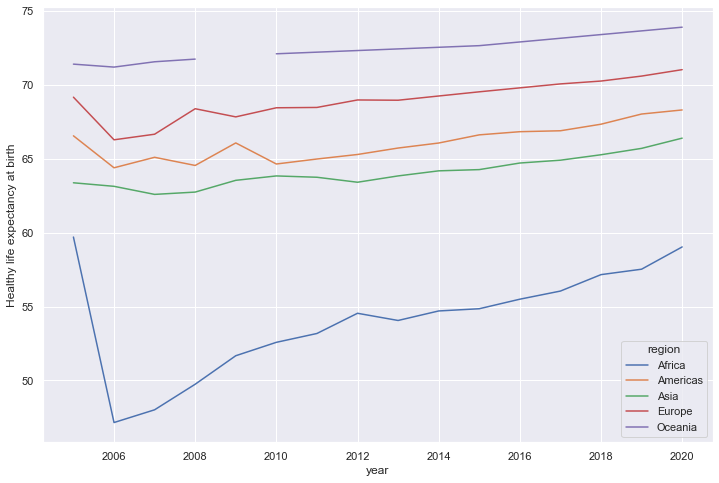

In [7]:
sns.set(rc={'figure.figsize':(12,8)})
sns.set()  # use Seaborn styles
life_expt.plot()
plt.ylabel('Healthy life expectancy at birth')
plt.savefig('Healthy life expectancy at birth.pdf')